# .......................................................MashaAllah............................................................................ 

# Tranning model for (CV)FruitClassification

# by: Abdullah and Bros

#ConvolutionNeuralNetwork #DeepLearning #MachineLearning #ComputerVission #ArtificialIntaligence #DataScience 

In [2]:
import matplotlib.pyplot as plt
import cv2

# 1. Check Design

In [3]:
s = cv2.imread('../DATA/fruits-360_dataset/fruits-360/T&T(cutom)/Training/Apple Braeburn/136_100.jpg')

In [4]:
s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)

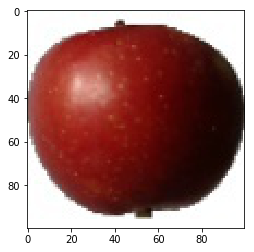

In [5]:
plt.imshow(s)

In [6]:
s.shape

(100, 100, 3)

# 2. Image Data Generator Obj creation ... for rescaling and stuff like that

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [8]:
#img_gen = ImageDataGenerator( rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
img_gen = ImageDataGenerator(rescale=1/255)

In [86]:
img_gen.flow_from_directory('../DATA/fruits-360_dataset/fruits-360/T&T(cutom)/Training') # return the itrator and two classes identified

Found 60498 images belonging to 120 classes.


# 4. Building Model

In [10]:
from keras.models import Sequential

In [11]:
input_shape = (100,100,3)

In [12]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [42]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5),input_shape=(100,100,3) ))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2 ))

model.add(Conv2D(filters=32, kernel_size=(5,5) ))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2 ))

model.add(Conv2D(filters=64, kernel_size=(5,5) ))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2 ))

model.add(Conv2D(filters=128, kernel_size=(5,5) ))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=2 ))





# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
#model.add(Dropout(0.5))

#model.add(Flatten())


model.add(Dense(1024))

model.add(Flatten())
model.add(Dense(256))


model.add(Dense(1, activation='softmax'))


In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)         204928    
__________

In [63]:

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# 5. Bulit Model Summary

In [64]:
#model.summary()

# 6. Activating Image Generator

In [65]:
batch_size = 10

In [66]:
input_shape = (100,100,3)

In [67]:
import numpy as np

In [68]:
input_shape = (100,100,3)

In [69]:
train_image_gen = img_gen.flow_from_directory ('../DATA/fruits-360_dataset/fruits-360/T&T(cutom2)/Training', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

Found 1953 images belonging to 4 classes.


In [70]:
test_image_gen = img_gen.flow_from_directory('../DATA/fruits-360_dataset/fruits-360/T&T(cutom2)/Test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

Found 654 images belonging to 4 classes.


In [71]:
train_image_gen.batch_size

10

In [72]:
#from keras.utils.np_utils.to_categorical import 

In [73]:
from keras.utils import to_categorical
#y_binary = to_categorical(y_int)

# 7. Classes we have

In [74]:
train_image_gen.class_indices

{'Apple Braeburn': 0, 'Banana': 1, 'Orange': 2, 'Strawberry': 3}

# 8.Traning Model for 100 epochs

In [75]:
import warnings

In [76]:
warnings.filterwarnings('ignore')

In [78]:
results = model.fit_generator(train_image_gen,epochs=1, steps_per_epoch=150, validation_data=test_image_gen, validation_steps=12)

Epoch 1/1
150/150 [==============================] - 46s 308ms/step - loss: -8.0453 - acc: 0.2516 - val_loss: -7.8981 - val_acc: 0.2538


In [80]:
from keras.preprocessing import image 

In [85]:
tester_file = '../DATA/fruits-360_dataset/fruits-360/T&T(cutom2)/Test/Orange/30_100.jpg'
tester = image.load_img(tester_file,target_size=(100,100))
tester = image.img_to_array(tester)
import numpy as np
tester = np.expand_dims(tester,axis=0)
tester = tester/255
model.predict_classes(tester)

array([[1]])

In [83]:
model.predict(tester)

array([[1.]], dtype=float32)

# 9. Evoluating performance 

In [136]:
results.history['acc']

[0.14458333333333334,
 0.1416003351612075,
 0.14327607875994972,
 0.14662756599488996,
 0.14291666666666666,
 0.14237573715248525,
 0.14208333333333334,
 0.14620863007959783,
 0.14875,
 0.13824884795123782,
 0.14083333333333334,
 0.15122156697556866,
 0.1375,
 0.14458333333333334,
 0.15123586092576552,
 0.1277754503685808,
 0.15207373271889402,
 0.14997905320485966,
 0.13583333333333333,
 0.14160033514872225,
 0.145,
 0.15417017695425736,
 0.13333333333333333,
 0.14285714285714285,
 0.14578969417679094,
 0.14458333333333334,
 0.14160033514872225,
 0.1449518223711772,
 0.13833333333333334,
 0.14872224549643903,
 0.13958333333333334,
 0.1470465019101821,
 0.14201927105152912,
 0.14291666666666666,
 0.1427969671566143,
 0.1425,
 0.14458333333333334,
 0.14537075827398407,
 0.14785172704296545,
 0.14416666666666667,
 0.13447842480100544,
 0.14916666666666667,
 0.14285714285714285,
 0.15208333333333332,
 0.13112693757855048,
 0.1508169250104734,
 0.14243820696682125,
 0.14125,
 0.14662756598

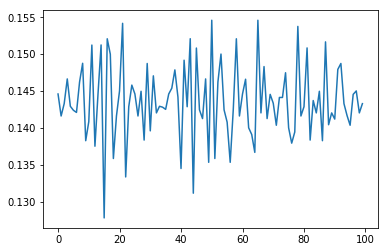

In [137]:
plt.plot(results.history['acc'])

# 10. load and save model

In [138]:
from keras.models import load_model

In [139]:
model.save('Model3942.h5')

In [140]:
#new_model = load_model('cat_dog_100epochs.h5')

# 11. Predict new image

In [141]:
from keras.preprocessing import image 

In [178]:
tester_file = '../DATA/fruits-360_dataset/fruits-360/test-multiple_fruits/Bananas(lady_finger)5.jpg'

In [191]:
tester = image.load_img(tester_file,target_size=(100,100))

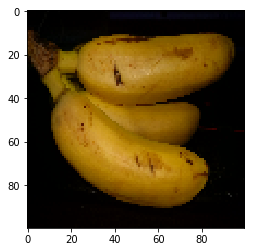

In [192]:
plt.imshow(tester)

In [193]:
tester = image.img_to_array(tester)

In [194]:
tester.shape

(100, 100, 3)

In [195]:
import numpy as np

In [196]:
tester = np.expand_dims(tester,axis=0)

In [197]:
tester.shape

(1, 100, 100, 3)

In [198]:
tester = tester/255

In [199]:
model.predict_classes(tester)

array([[1]])

In [200]:
model.predict(tester)

array([[1.]], dtype=float32)

# End

# A model coadeded by M Abdullah Anwar ( 17K-3942 )